# 딥러닝 프로젝트
지금까지 학습한 내용을 토대로 다음과 같은 세가지 프로젝트를 진행한다.  
* Boston 주택 가격 예측 모델
* Reuters 딥러닝 모델
* CIFAR10 딥러닝 모델

<br>

## 개요
---
* Boston 주택 가격 예측 모델
> 여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행한다.

* Reuters 딥러닝 모델
> 시퀀스 데이터를 받아서 분류하는 프로젝트를 진행한다.

* CIFAR10 딥러닝 모델
> 이미지 데이터를 받아서 분류하는 프로젝트를 진행한다.

## 목차
---
* Boston 주택 가격 예측 모델
    * 데이터 로드 및 전처리
    * 모델 구성 및 컴파일
    * 모델 학습
    * 모델 평가 및 예측
    * 모델 최적화
* Reuters 딥러닝 모델
    * 데이터 로드 및 전처리
    * 모델 구성 및 컴파일
    * 모델 학습
    * 모델 평가 및 예측
    * 모델 최적화
* CIFAR10 딥러닝 모델
    * 데이터 로드 및 전처리
    * 모델 구성 및 컴파일
    * 모델 학습
    * 모델 평가 및 예측
    * 모델 최적화

### Boston 주택 가격 예측 모델

<br>

#### 데이터 로드 및 전처리
---
* 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용한다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# Load boston_housing dataset
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

# Data split
(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

# Check size of dataset
print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (404, 13) 레이블: (404,)
학습 데이터: (282, 13) 레이블: (282,)
검증 데이터: (122, 13) 레이블: (122,)
테스트 데이터: (102, 13) 레이블: (102,)


* 학습 데이터와 검증 데이터는 x_train_full을 7:3 비율로 분할한다.

In [3]:
import numpy as np

# Normalization of train data
x_train_norm = x_train - np.mean(x_train)
x_train_norm /= np.std(x_train)

# Normalization of test data
x_test_norm = x_test - np.mean(x_test)
x_test_norm /= np.std(x_test)

# Normalization of validation data
x_val_norm = x_val - np.mean(x_val)
x_val_norm /= np.std(x_val)

* 학습 데이터와 검증 데이터, 시험 데이터를 각각의 평균이 0, 표준편차가 1이 되도록 정규화를 진행한다.

#### 모델 구성 및 컴파일
---
* Sequential API 방법으로 딥러닝 모델을 구성하고 컴파일을 진행한다.

In [4]:
# Create model using sequrntial API
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(x_train_norm.shape[1],), name='Input_layer'))
model.add(layers.Dropout(0.5))

# Hidden layer
model.add(layers.Dense(200, name = 'Hidden_Layer1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(100, name = 'Hidden_Layer2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, name = 'Hidden_Layer3'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Output layer
model.add(layers.Dense(1, name = 'Output_Layer', activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 13)                0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 200)               2800      
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 Hidden_Layer2 (Dense)       (None, 100)               20100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                       

* 전체적인 모델의 구조는 입력층 - 3개의 레이어로 구성된 은닉층 - 출력층으로 구성되어 있다.
    * 입력층
        * 입력 데이터의 형태는 피처의 개수에 맞춘다.
        * dropout 기법으로 전체 뉴런의 무작위 50%만 학습에 참여한다.
    * 은닉층
        * 첫 번째 레이어: 뉴런의 개수는 200개이며, 배치 정규화를 적용한 후 ReLU 활성화 함수를 사용한다.
        * 두 번째 레이어: 뉴런의 개수는 100개이며, 배치 정규화를 적용한 후 ReLU 활성화 함수를 사용한다.
        * 세 번째 레이어: 뉴런의 개수는 10개이며, 배치 정규화를 적용한 후 ReLU 활성화 함수를 사용한다.
    * 출력층
        *  표현(예측)하고자 하는 데이터가 집값 하나이므로 출력 노드는 1개로 지정한다.
        *  회귀모델이므로 활성화 함수는 linear 함수를 사용한다.

In [5]:
# Compile model
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mean_absolute_error'])

* 모델을 컴파일하는 과정에서 옵티마이져, 손실함수, 평가지표를 지정한다.
    * 옵티마이져는 rmsprop과 adagrad의 특징을 포함하는 adam으로 지정한다.
    * 손실함수는 평균오차제곱인 mean_squared_error로 지정한다.
    * 평가지표는 평균절대오차인 mean_absolute_error로 지정한다. 

#### 모델 학습
---
* epochs와 callback을 설정하여 모델의 학습량을 설정한다.

In [6]:
# Import callback library
from tensorflow.keras import callbacks

# Define early stop options
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                          monitor='val_loss',
                                          restore_best_weights=True)

# Start model training
history = model.fit(x_train_norm, y_train, epochs=100,
                   validation_data=(x_val_norm, y_val),
                   callbacks=[early_stopping_cb])

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 537.9957 - mean_absolute_error: 21.3250 - val_loss: 617.7067 - val_mean_absolute_error: 23.0996
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 532.0190 - mean_absolute_error: 21.1924 - val_loss: 613.1547 - val_mean_absolute_error: 23.0152
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 524.8455 - mean_absolute_error: 21.0813 - val_loss: 607.6055 - val_mean_absolute_error: 22.9085
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 520.8242 - mean_absolute_error: 21.0044 - val_loss: 602.3994 - val_mean_absolute_error: 22.8064
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 517.0298 - mean_absolute_error: 20.9223 - val_loss: 594.9423 - val_mean_absolute_error: 22.6464
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 513.1690 - mean_absolute_error: 20.8317 - val_loss: 588.0790 - val_mean_absolute_error: 22.49

* 과적합 방지를 위해 하이퍼 파라미터 값을 조정하여 모델 학습을 진행한다.
    * callback: EarlyStopping 함수를 사용하여 검증 손실율이 10회동안 큰 변화가 없을 때 모델을 종료하고 학습 과정 중 최적화된 가중치 저장
    * validation_data: 학습과 동시에 검증 데이터로 검증 진행
    * batch_size: 전체 데이터에서 무작위 128개의 데이터를 선발하여 학습 진행
    * epochs: 학습 100회 반복

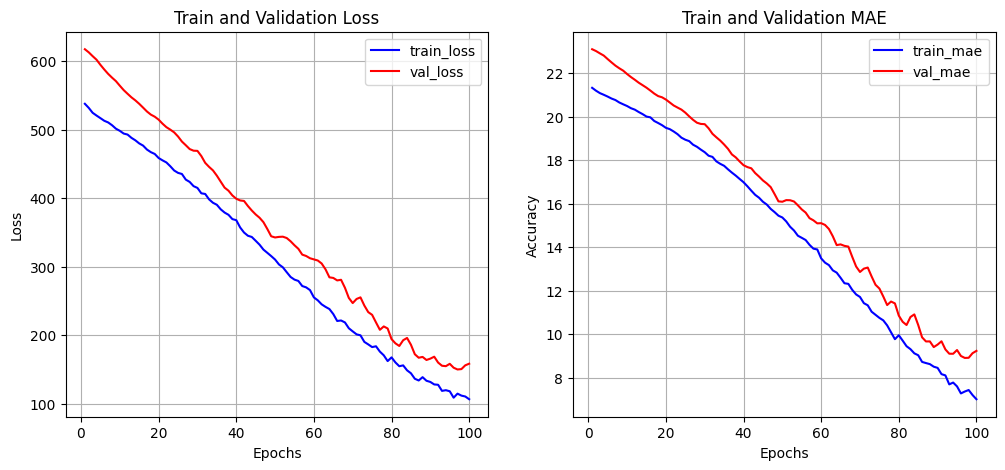

In [7]:
plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mean_absolute_error']
val_mae = history_dict['val_mean_absolute_error']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 첫 번째 그래프: 학습 진행도에 따른 손실 함수 값으로, 에폭이 진행됨에 따라 손실 함수 값이 점점 낮아지는 것으로 보아 학습이 원할하게 진행되고 있다는 것을 알 수 있다.
* 두 번째 그래프: 학습 진행도에 따른 평균절대오차 값으로, 에폭이 진행됨에 따라 절대 오차 값들의 평균이 낮아지는 것으로 보아 학습이 원할하게 진행되고 있다는 것을 알 수 있다.

#### 모델 평가 및 예측
---
* 초기 데이터셋을 불어올 때 나눠 놓은 평가 데이터로 모델의 성능을 평가한다.

In [8]:
# Evaluate the performance of the model
loss, mae = model.evaluate(x_test_norm, y_test)

print(f'평가 손실: {loss:.4f}')
print(f'평가 평균절대오차: {mae:.4f}')
# Predict the Boston's house price
pred = model.predict(x_test_norm)

for i in range(len(pred)):
    print(f'실제 값: {y_test[i]}, 예측값: {pred[i][0]}')

4/4 [==============================] - 0s 1ms/step - loss: 159.6647 - mean_absolute_error: 9.8411
평가 손실: 159.6647
평가 평균절대오차: 9.8411
4/4 [==============================] - 0s 798us/step
실제 값: 7.2, 예측값: 14.124946594238281
실제 값: 18.8, 예측값: 15.23901653289795
실제 값: 19.0, 예측값: 13.06718635559082
실제 값: 27.0, 예측값: 15.417435646057129
실제 값: 22.2, 예측값: 13.212695121765137
실제 값: 24.5, 예측값: 16.503948211669922
실제 값: 31.2, 예측값: 16.973726272583008
실제 값: 22.9, 예측값: 14.62474536895752
실제 값: 20.5, 예측값: 10.289475440979004
실제 값: 23.2, 예측값: 13.297539710998535
실제 값: 18.6, 예측값: 19.134174346923828
실제 값: 14.5, 예측값: 12.918998718261719
실제 값: 17.8, 예측값: 15.105175018310547
실제 값: 50.0, 예측값: 12.003752708435059
실제 값: 20.8, 예측값: 14.25145149230957
실제 값: 24.3, 예측값: 15.934494972229004
실제 값: 24.2, 예측값: 16.30096435546875
실제 값: 19.8, 예측값: 16.593294143676758
실제 값: 19.1, 예측값: 13.22697925567627
실제 값: 22.7, 예측값: 13.221677780151367
실제 값: 12.0, 예측값: 12.880038261413574
실제 값: 10.2, 예측값: 14.72400951385498
실제 값: 20.0, 예측값: 13.65967178344

* 결과가 썩 만족스럽지 않다. 그루원들의 조언으로는 회귀 모델은 선형 모델이라 배치 정규화 등의 과정이 들어가면 오히려 모델의 성능이 떨어질 수 있다고 한다.
* 배치 정규화를 제거하고, 활성화 함수를 linear로 변경한 모델을 다시 만들어 보자.

#### 모델 최적화
---
* 더 나은 결과를 출력하기 위해 하이퍼 파라미터 값을 조정하는 과정을 진행한다.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 200)               2800      
                                                                 
 Hidden_Layer2 (Dense)       (None, 100)               20100     
                                                                 
 Hidden_Layer3 (Dense)       (None, 10)                1010      
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 23921 (93.44 KB)
Trainable params: 23921 (93.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
9/9 [=

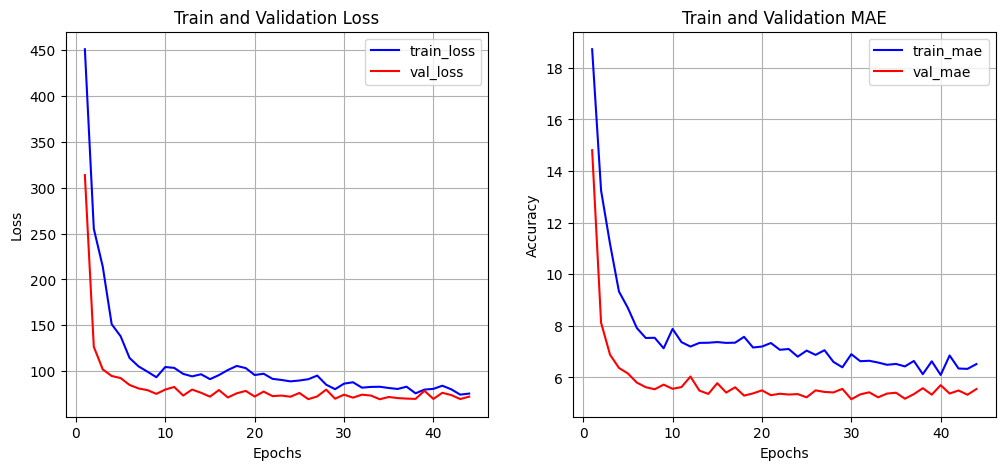

4/4 [==============================] - 0s 804us/step - loss: 63.7897 - mean_absolute_error: 5.7011
평가 손실: 63.7897
평가 평균절대오차: 5.7011
4/4 [==============================] - 0s 776us/step
실제 값: 7.2, 예측값: 16.718612670898438
실제 값: 18.8, 예측값: 21.00092124938965
실제 값: 19.0, 예측값: 24.549217224121094
실제 값: 27.0, 예측값: 20.924232482910156
실제 값: 22.2, 예측값: 23.95206642150879
실제 값: 24.5, 예측값: 24.043394088745117
실제 값: 31.2, 예측값: 25.399816513061523
실제 값: 22.9, 예측값: 24.442529678344727
실제 값: 20.5, 예측값: 21.283201217651367
실제 값: 23.2, 예측값: 20.74236297607422
실제 값: 18.6, 예측값: 19.969064712524414
실제 값: 14.5, 예측값: 20.92333984375
실제 값: 17.8, 예측값: 20.365154266357422
실제 값: 50.0, 예측값: 24.43242645263672
실제 값: 20.8, 예측값: 19.341917037963867
실제 값: 24.3, 예측값: 24.813901901245117
실제 값: 24.2, 예측값: 26.449378967285156
실제 값: 19.8, 예측값: 24.692646026611328
실제 값: 19.1, 예측값: 20.40641212463379
실제 값: 22.7, 예측값: 20.3114070892334
실제 값: 12.0, 예측값: 18.7611026763916
실제 값: 10.2, 예측값: 19.463287353515625
실제 값: 20.0, 예측값: 23.344900131225586
실

In [10]:
# Create model using sequrntial API
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(x_train_norm.shape[1],), name='Input_layer'))
model.add(layers.Dropout(0.5))

# Hidden layer
model.add(layers.Dense(200, name = 'Hidden_Layer1', activation = 'linear'))
model.add(layers.Dense(100, name = 'Hidden_Layer2', activation = 'linear'))
model.add(layers.Dense(10, name = 'Hidden_Layer3', activation = 'linear'))

# Output layer
model.add(layers.Dense(1, name = 'Output_Layer', activation = 'linear'))
model.summary()

# Define early stop options
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                          monitor='val_loss',
                                          restore_best_weights=True)

# Compile model
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mean_absolute_error'])

# Start model training
history = model.fit(x_train_norm, y_train, epochs=100,
                   validation_data=(x_val_norm, y_val),
                   callbacks=[early_stopping_cb])

plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mean_absolute_error']
val_mae = history_dict['val_mean_absolute_error']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# Evaluate the performance of the model
loss, mae = model.evaluate(x_test_norm, y_test)

print(f'평가 손실: {loss:.4f}')
print(f'평가 평균절대오차: {mae:.4f}')
# Predict the Boston's house price
pred = model.predict(x_test_norm)

for i in range(len(pred)):
    print(f'실제 값: {y_test[i]}, 예측값: {pred[i][0]}')

* 수정한 모델로 학습을 진행한 결과, 평가 손실이 약 159.7에서 약 63.8로 감소하였고 평가 평균절대오차가 약 9.8에서 5.7로 감소하였다.
* 과대적합의 위험은 적은 것으로 판단이 되니, dropout을 제거하고 은닉층의 레이어 수를 줄여보자.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer2 (Dense)       (None, 100)               1400      
                                                                 
 Hidden_Layer3 (Dense)       (None, 10)                1010      
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 2421 (9.46 KB)
Trainable params: 2421 (9.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
9/9 [==============================] - 0s 9ms/step - loss: 518.8432 - mean_absolute_error: 20.8242 - val_loss: 509.2266 - val_mean_absolute_error: 20.5737
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 436.2893 - mean_absolute_error: 18.6836 - val_lo

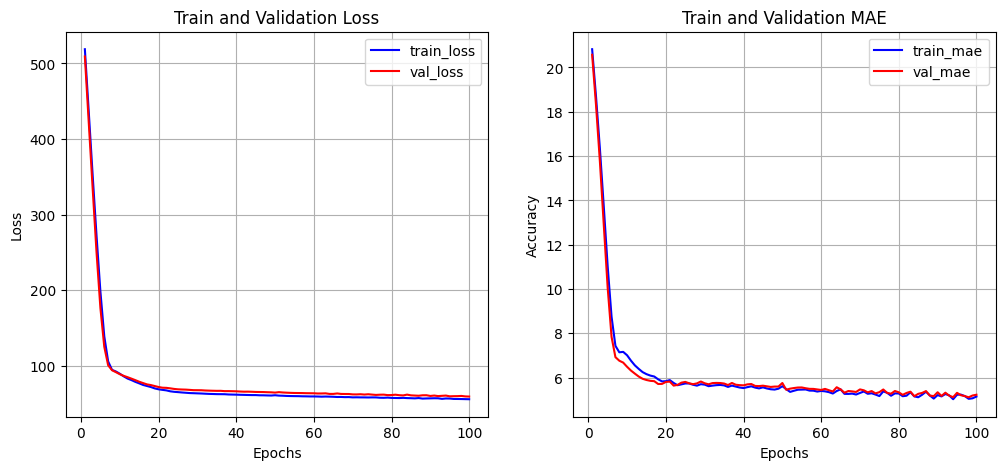

4/4 [==============================] - 0s 792us/step - loss: 53.7880 - mean_absolute_error: 5.3708
평가 손실: 53.7880
평가 평균절대오차: 5.3708
4/4 [==============================] - 0s 1ms/step
실제 값: 7.2, 예측값: 10.26716136932373
실제 값: 18.8, 예측값: 21.45036506652832
실제 값: 19.0, 예측값: 25.940937042236328
실제 값: 27.0, 예측값: 21.21714210510254
실제 값: 22.2, 예측값: 25.483774185180664
실제 값: 24.5, 예측값: 24.073009490966797
실제 값: 31.2, 예측값: 27.724462509155273
실제 값: 22.9, 예측값: 26.44157600402832
실제 값: 20.5, 예측값: 22.76483917236328
실제 값: 23.2, 예측값: 19.033279418945312
실제 값: 18.6, 예측값: 17.090375900268555
실제 값: 14.5, 예측값: 22.15837287902832
실제 값: 17.8, 예측값: 20.46800422668457
실제 값: 50.0, 예측값: 26.46283531188965
실제 값: 20.8, 예측값: 16.512706756591797
실제 값: 24.3, 예측값: 26.019750595092773
실제 값: 24.2, 예측값: 26.551172256469727
실제 값: 19.8, 예측값: 24.28765869140625
실제 값: 19.1, 예측값: 18.682315826416016
실제 값: 22.7, 예측값: 18.8358211517334
실제 값: 12.0, 예측값: 16.221303939819336
실제 값: 10.2, 예측값: 13.053014755249023
실제 값: 20.0, 예측값: 24.36456871032715
실제

In [18]:
# Create model using sequrntial API
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(x_train_norm.shape[1],), name='Input_layer'))

# Hidden layer
model.add(layers.Dense(200, name = 'Hidden_Layer1', activation = 'linear'))
model.add(layers.Dense(10, name = 'Hidden_Layer3', activation = 'linear'))

# Output layer
model.add(layers.Dense(1, name = 'Output_Layer', activation = 'linear'))
model.summary()

# Define early stop options
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                          monitor='val_loss',
                                          restore_best_weights=True)

# Compile model
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mean_absolute_error'])

# Start model training
history = model.fit(x_train_norm, y_train, epochs=100,
                   validation_data=(x_val_norm, y_val),
                   callbacks=[early_stopping_cb])

plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mean_absolute_error']
val_mae = history_dict['val_mean_absolute_error']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# Evaluate the performance of the model
loss, mae = model.evaluate(x_test_norm, y_test)

print(f'평가 손실: {loss:.4f}')
print(f'평가 평균절대오차: {mae:.4f}')
# Predict the Boston's house price
pred = model.predict(x_test_norm)

for i in range(len(pred)):
    print(f'실제 값: {y_test[i]}, 예측값: {pred[i][0]}')

* 평가 손실과 평가 평균절대오차는 미미한 값으로 감소했지만, 학습 그래프와 평가 그래프가 거의 일치하게 되어서 이 정도면 만족스러운 결과라고 생각한다.

### Reuters 딥러닝 모델

<br>

#### 데이터 로드 및 전처리
---
* 데이터셋은 keras.datasets에서 불러올 수 있는 reuster 데이터셋을 활용하고, 파라미터 조정을 통해 단어의 개수는 10000개로 제한한다.

In [19]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [32]:
# Load reuster dataset
from keras.datasets import reuters
from sklearn.model_selection import train_test_split

# Data split
(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data(num_words=10000)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.25,
                                                  random_state=123)

# Check size of dataset
print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (6736,) 레이블: (6736,)
검증 데이터: (2246,) 레이블: (2246,)
테스트 데이터: (2246,) 레이블: (2246,)


* 보스턴 집값 예측 모델과 달리 이번에는 테스트 데이터셋의 비율을 25%로 지정하고, 단어 수를 10000개로 제한한다.

In [33]:
# Define one-hot encoding function
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.

    return results

# Convert data with one-hot encoding
x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(x_test)

# Convert data to label type
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

* one_hot_encoding 함수를 정의하고 x데이터에 대한 one-hot encoding을 진행한다.
* y데이터를 label 형식으로 변환한다.

#### 모델 구성 및 컴파일
---
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성한다.

In [45]:
# Create model using sequrntial API
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(10000,), name='Input_layer'))
model.add(layers.Dropout(0.5))

# Hidden layer
model.add(layers.Dense(512, name = 'Hidden_Layer1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(258, name = 'Hidden_Layer2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name = 'Hidden_Layer3'))
model.add(layers.Activation('relu'))

# Output layer
model.add(layers.Dense(46, name = 'Output_Layer', activation = 'softmax'))
model.summary()

# Compile model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 10000)             0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 512)               5120512   
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 Hidden_Layer2 (Dense)       (None, 258)               132354    
                                                                 
 batch_normalization_10 (Ba  (None, 258)               1032      
 tchNormalization)                                   

* 빠른 학습과 과적합을 방지하기 위해 각 Dense에 배치 정규화를 진행하고, 전체 노드의 50%만 학습에 참여하게끔 dropout을 설정했다.
* 컴파일 하이퍼 파라미터를 사용하여 모델 성능을 향상 시킨다.
    * 옵티마이져: RmsProp 기법 사용
    * 손실함수: 교차엔트로피 오차 기법 사용
    * 평가 지표: 정확도를 평가지표로 사용

#### 모델 학습
* 콜백 함수를 적용하여 모델 학습을 진행한다.

In [46]:
from tensorflow.keras import callbacks

# Callback method
check_point_cb = callbacks.ModelCheckpoint('reuters_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

# Start model training
history = model.fit(x_train, y_train, epochs=100,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
14/14 [==============================] - 2s 89ms/step - loss: 1.7935 - accuracy: 0.5891 - val_loss: 3.1706 - val_accuracy: 0.6995
Epoch 2/100
14/14 [==============================] - 1s 77ms/step - loss: 0.8943 - accuracy: 0.7889 - val_loss: 2.8022 - val_accuracy: 0.7614
Epoch 3/100
14/14 [==============================] - 1s 71ms/step - loss: 0.6068 - accuracy: 0.8579 - val_loss: 2.3717 - val_accuracy: 0.7369
Epoch 4/100
14/14 [==============================] - 1s 68ms/step - loss: 0.4305 - accuracy: 0.8953 - val_loss: 1.9484 - val_accuracy: 0.6839
Epoch 5/100
14/14 [==============================] - 1s 68ms/step - loss: 0.3246 - accuracy: 0.9209 - val_loss: 1.6120 - val_accuracy: 0.6394
Epoch 6/100
14/14 [==============================] - 1s 71ms/step - loss: 0.2822 - accuracy: 0.9276 - val_loss: 1.4289 - val_accuracy: 0.7048
Epoch 7/100
14/14 [==============================] - 1s 70ms/step - loss: 0.2343 - accuracy: 0.9390 - val_loss: 1.3039 - val_accuracy: 0.6825
Epoch 

* ModelCheckpoint() 메서드와 EarlyStopping() 메서드를 사용하여 최적의 모델을 저장한다.
* 미니배치와 에폭을 사용하여 모델의 성능이 떨어지는 것을 방지한다.

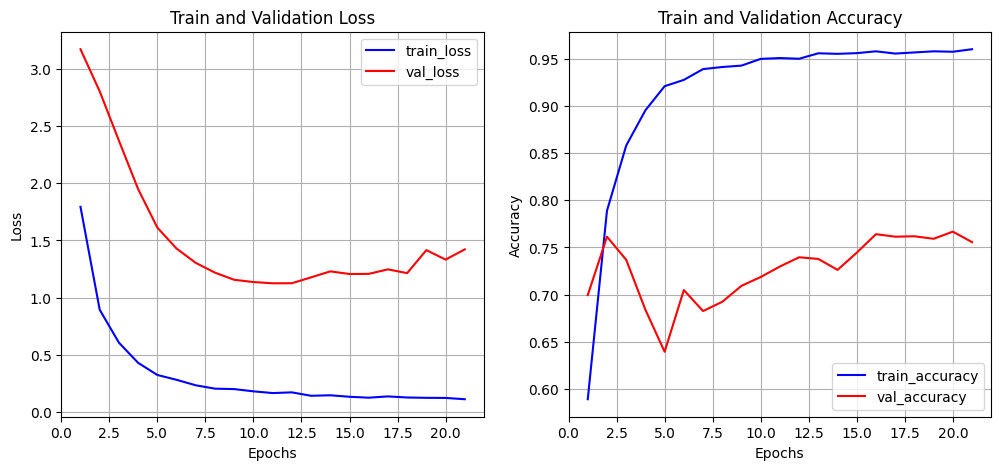

In [48]:
plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 딱 봐도 과적합이다.

#### 모델 평가 및 예측
---
테스트 데이터셋을 활용하여 모델의 성능을 평가하고 예측을 진행해본다.

In [49]:
# Evaluate the performance of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Predict the News category
pred = model.predict(x_test)

for i in range(len(pred)):
    top_classes = sorted(range(len(pred[i])), key=lambda k: pred[i][k], reverse=True)[:3]
    print(f"Actual: {np.argmax(y_test[i])}, Predicted: {top_classes}")

71/71 [==============================] - 0s 4ms/step - loss: 1.0992 - accuracy: 0.7337
Test accuracy: 0.7337489128112793
Test loss: 1.0991624593734741
71/71 [==============================] - 0s 4ms/step
Actual: 3, Predicted: [3, 4, 20]
Actual: 10, Predicted: [10, 1, 3]
Actual: 1, Predicted: [1, 3, 20]
Actual: 4, Predicted: [4, 3, 16]
Actual: 4, Predicted: [13, 4, 3]
Actual: 3, Predicted: [3, 4, 1]
Actual: 3, Predicted: [3, 4, 20]
Actual: 3, Predicted: [3, 4, 19]
Actual: 3, Predicted: [3, 4, 20]
Actual: 3, Predicted: [3, 20, 19]
Actual: 5, Predicted: [1, 4, 19]
Actual: 4, Predicted: [4, 3, 20]
Actual: 1, Predicted: [1, 3, 10]
Actual: 3, Predicted: [3, 4, 19]
Actual: 1, Predicted: [1, 3, 10]
Actual: 11, Predicted: [11, 3, 19]
Actual: 23, Predicted: [4, 20, 3]
Actual: 3, Predicted: [3, 4, 11]
Actual: 19, Predicted: [19, 3, 20]
Actual: 3, Predicted: [3, 4, 19]
Actual: 8, Predicted: [8, 19, 20]
Actual: 3, Predicted: [3, 4, 1]
Actual: 3, Predicted: [3, 4, 11]
Actual: 3, Predicted: [4, 3, 20

* 정확도도 떨어지고 손실률도 높다. 하이퍼 파라미터 조정을 통해 성능을 높여보자.

#### 모델 최적화
---
* 각종 하이퍼 파라미터 값을 조정하여 과적합을 방지하면서 모델의 성능을 높여본다.

In [50]:
# Create model using sequrntial API
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(10000,), name='Input_layer'))
model.add(layers.Dropout(0.5))

# Hidden layer
model.add(layers.Dense(64, name = 'Hidden_Layer1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64, name = 'Hidden_Layer2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Output layer
model.add(layers.Dense(46, name = 'Output_Layer', activation = 'softmax'))
model.summary()

# Compile model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

from tensorflow.keras import callbacks

# Callback method
check_point_cb = callbacks.ModelCheckpoint('reuters_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

# Start model training
history = model.fit(x_train, y_train, epochs=100,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_7 (Dropout)         (None, 10000)             0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 64)                640064    
                                                                 
 batch_normalization_11 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 64)                0         
                                                                 
 Hidden_Layer2 (Dense)       (None, 64)                4160      
                                                                 
 batch_normalization_12 (Ba  (None, 64)                256       
 tchNormalization)                                   

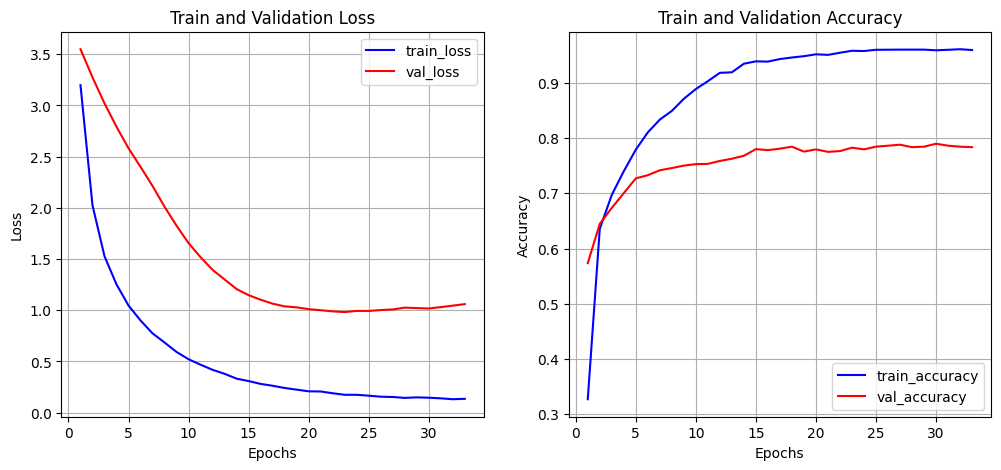

71/71 [==============================] - 0s 1ms/step - loss: 0.9880 - accuracy: 0.7823
Test accuracy: 0.7822796106338501
Test loss: 0.9879688620567322
71/71 [==============================] - 0s 870us/step
Actual: 3, Predicted: [3, 4, 39]
Actual: 10, Predicted: [10, 19, 1]
Actual: 1, Predicted: [1, 3, 16]
Actual: 4, Predicted: [4, 16, 3]
Actual: 4, Predicted: [13, 16, 4]
Actual: 3, Predicted: [3, 8, 28]
Actual: 3, Predicted: [3, 4, 24]
Actual: 3, Predicted: [3, 4, 19]
Actual: 3, Predicted: [3, 4, 8]
Actual: 3, Predicted: [3, 20, 16]
Actual: 5, Predicted: [1, 4, 24]
Actual: 4, Predicted: [4, 3, 23]
Actual: 1, Predicted: [1, 14, 11]
Actual: 3, Predicted: [3, 4, 19]
Actual: 1, Predicted: [1, 11, 3]
Actual: 11, Predicted: [11, 16, 3]
Actual: 23, Predicted: [4, 3, 20]
Actual: 3, Predicted: [3, 4, 15]
Actual: 19, Predicted: [19, 20, 12]
Actual: 3, Predicted: [3, 4, 19]
Actual: 8, Predicted: [8, 19, 20]
Actual: 3, Predicted: [3, 4, 15]
Actual: 3, Predicted: [3, 4, 19]
Actual: 3, Predicted: [4

In [51]:
plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# Evaluate the performance of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Predict the News category
pred = model.predict(x_test)

for i in range(len(pred)):
    top_classes = sorted(range(len(pred[i])), key=lambda k: pred[i][k], reverse=True)[:3]
    print(f"Actual: {np.argmax(y_test[i])}, Predicted: {top_classes}")

* 은닉층의 레이어 수를 줄이고, 노드 수를 줄이고, 옵티마이저를 변경하여 과적합을 많이 줄였다. 좀 더 줄여보자.

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 10000)             0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 32)                320032    
                                                                 
 batch_normalization_13 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 activation_17 (Activation)  (None, 32)                0         
                                                                 
 Hidden_Layer2 (Dense)       (None, 32)                1056      
                                                                 
 batch_normalization_14 (Ba  (None, 32)                128       
 tchNormalization)                                   

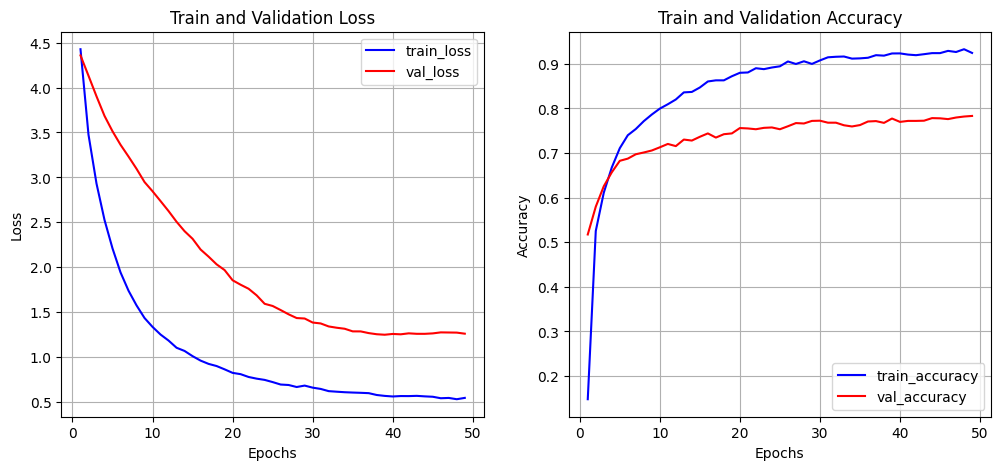

71/71 [==============================] - 0s 809us/step - loss: 1.2185 - accuracy: 0.7823
Test accuracy: 0.7822796106338501
Test loss: 1.2185157537460327
71/71 [==============================] - 0s 622us/step
Actual: 3, Predicted: [3, 4, 11]
Actual: 10, Predicted: [4, 1, 10]
Actual: 1, Predicted: [1, 4, 3]
Actual: 4, Predicted: [4, 16, 3]
Actual: 4, Predicted: [13, 19, 21]
Actual: 3, Predicted: [3, 4, 27]
Actual: 3, Predicted: [3, 4, 16]
Actual: 3, Predicted: [3, 4, 27]
Actual: 3, Predicted: [3, 4, 27]
Actual: 3, Predicted: [3, 4, 20]
Actual: 5, Predicted: [1, 24, 19]
Actual: 4, Predicted: [4, 3, 19]
Actual: 1, Predicted: [1, 24, 3]
Actual: 3, Predicted: [3, 4, 16]
Actual: 1, Predicted: [1, 4, 26]
Actual: 11, Predicted: [11, 4, 19]
Actual: 23, Predicted: [3, 20, 4]
Actual: 3, Predicted: [3, 4, 12]
Actual: 19, Predicted: [19, 20, 4]
Actual: 3, Predicted: [3, 4, 27]
Actual: 8, Predicted: [8, 20, 19]
Actual: 3, Predicted: [3, 4, 27]
Actual: 3, Predicted: [3, 4, 27]
Actual: 3, Predicted: [3

In [52]:
# Create model using sequrntial API
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(10000,), name='Input_layer'))
model.add(layers.Dropout(0.5))

# Hidden layer
model.add(layers.Dense(32, name = 'Hidden_Layer1',kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(32, name = 'Hidden_Layer2',kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Output layer
model.add(layers.Dense(46, name = 'Output_Layer', activation = 'softmax'))
model.summary()

# Compile model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

from tensorflow.keras import callbacks

# Callback method
check_point_cb = callbacks.ModelCheckpoint('reuters_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

# Start model training
history = model.fit(x_train, y_train, epochs=100,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# Evaluate the performance of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Predict the News category
pred = model.predict(x_test)

for i in range(len(pred)):
    top_classes = sorted(range(len(pred[i])), key=lambda k: pred[i][k], reverse=True)[:3]
    print(f"Actual: {np.argmax(y_test[i])}, Predicted: {top_classes}")

* L2 규제를 적용하고 노드 개수를 더 줄여 과적합을 많이 낮췄지만, 정확도가 80%를 넘지 않는다. 좀 더 시도해보자.

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 10000)             0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 32)                320032    
                                                                 
 batch_normalization_21 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 32)                0         
                                                                 
 Hidden_Layer2 (Dense)       (None, 32)                1056      
                                                                 
 batch_normalization_22 (Ba  (None, 32)                128       
 tchNormalization)                                   

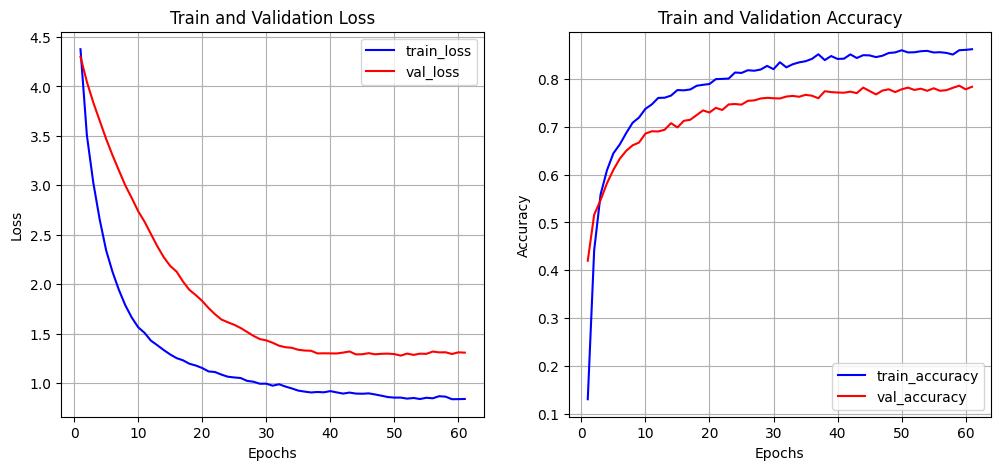

71/71 [==============================] - 0s 782us/step - loss: 1.2753 - accuracy: 0.7814
Test accuracy: 0.7813891172409058
Test loss: 1.2753021717071533
71/71 [==============================] - 0s 724us/step
Actual: 3, Predicted: [3, 4, 16]
Actual: 10, Predicted: [10, 9, 1]
Actual: 1, Predicted: [1, 13, 10]
Actual: 4, Predicted: [4, 3, 16]
Actual: 4, Predicted: [13, 16, 11]
Actual: 3, Predicted: [3, 4, 16]
Actual: 3, Predicted: [3, 4, 16]
Actual: 3, Predicted: [3, 4, 16]
Actual: 3, Predicted: [3, 4, 20]
Actual: 3, Predicted: [3, 20, 16]
Actual: 5, Predicted: [1, 4, 10]
Actual: 4, Predicted: [4, 3, 19]
Actual: 1, Predicted: [1, 24, 14]
Actual: 3, Predicted: [3, 4, 19]
Actual: 1, Predicted: [13, 1, 16]
Actual: 11, Predicted: [11, 16, 3]
Actual: 23, Predicted: [4, 3, 16]
Actual: 3, Predicted: [3, 4, 16]
Actual: 19, Predicted: [19, 20, 10]
Actual: 3, Predicted: [3, 4, 16]
Actual: 8, Predicted: [8, 20, 19]
Actual: 3, Predicted: [3, 4, 16]
Actual: 3, Predicted: [3, 4, 16]
Actual: 3, Predicte

In [56]:
# Create model using sequrntial API
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(10000,), name='Input_layer'))
model.add(layers.Dropout(0.7))

# Hidden layer
model.add(layers.Dense(32, name = 'Hidden_Layer1',kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(32, name = 'Hidden_Layer2',kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Output layer
model.add(layers.Dense(46, name = 'Output_Layer', activation = 'softmax'))
model.summary()

# Compile model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

from tensorflow.keras import callbacks

# Callback method
check_point_cb = callbacks.ModelCheckpoint('reuters_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

# Start model training
history = model.fit(x_train, y_train, epochs=100,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# Evaluate the performance of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Predict the News category
pred = model.predict(x_test)

for i in range(len(pred)):
    top_classes = sorted(range(len(pred[i])), key=lambda k: pred[i][k], reverse=True)[:3]
    print(f"Actual: {np.argmax(y_test[i])}, Predicted: {top_classes}")

* dropout으로 학습의 참여하는 뉴런의 개수를 30%로 낮췄더니 첫 시도보다 확연히 좋아진 그래프를 볼 수 있게 됐다.

### CIFAR10 딥러닝 모델

<br>

#### 데이터 로드 및 전처리
---
* keras.datasets에서 CIFAR10 데이터셋을 불러와 전처리한다.
* 학습 데이터와 검증 데이터로 분리하여 각 데이터의 크기를 확인한다.

In [97]:
# import library
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [116]:
#Load cifar10 dataset and split to train-test
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# Check size of dataset
print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


* 사용할 데이터를 불러와 2:8의 비율로 나누고, 각 데이터셋의 크기를 확인한다.

In [117]:
# Define class name variable
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

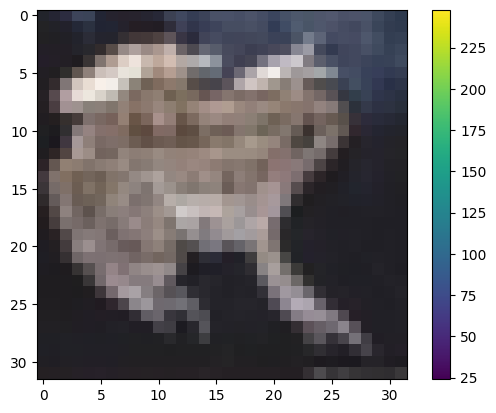

In [118]:
# Check data of first index 
plt.style.use('default')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [119]:
# Reshape data
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

# Check shape of data
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [120]:
# Normalizate the data
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

#### 모델 구성 및 컴파일
---
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성한다.

In [136]:
# # Create model using sequrntial API
model = models.Sequential()
model.add(layers.Dense(256, input_shape=(3072,), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* 3X3 크기의 필터 64개를 사용하는 2개의 합성곱 계층과 2X2 크기의 풀링 계층에 배치 정규화를 추가시켰다.
* dropout을 0.5로 설정하여 전체 뉴런의 50%만 학습에 참여시켰다.

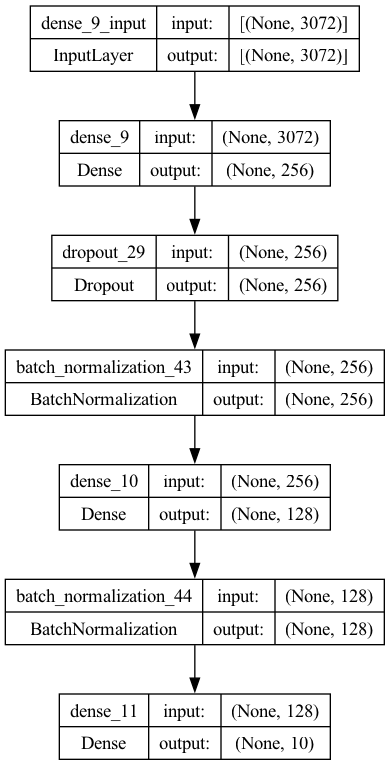

In [137]:
# Draw model
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

#### 모델 학습
---
* 콜백 함수를 적용하여 모델 학습을 진행한다.

In [138]:
# Callback method
check_point_cb = callbacks.ModelCheckpoint('cipar10_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

# Start model training
history = model.fit(x_train, y_train, epochs=100,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
79/79 [==============================] - 1s 13ms/step - loss: 2.1442 - accuracy: 0.2527 - val_loss: 1.8624 - val_accuracy: 0.3294
Epoch 2/100
79/79 [==============================] - 1s 11ms/step - loss: 1.8961 - accuracy: 0.3157 - val_loss: 1.8041 - val_accuracy: 0.3414
Epoch 3/100
79/79 [==============================] - 1s 12ms/step - loss: 1.8281 - accuracy: 0.3431 - val_loss: 2.0097 - val_accuracy: 0.2747
Epoch 4/100
79/79 [==============================] - 1s 11ms/step - loss: 1.7898 - accuracy: 0.3555 - val_loss: 1.9462 - val_accuracy: 0.3041
Epoch 5/100
79/79 [==============================] - 1s 11ms/step - loss: 1.7515 - accuracy: 0.3710 - val_loss: 1.7508 - val_accuracy: 0.3651
Epoch 6/100
79/79 [==============================] - 1s 12ms/step - loss: 1.7324 - accuracy: 0.3760 - val_loss: 1.7017 - val_accuracy: 0.3852
Epoch 7/100
79/79 [==============================] - 1s 11ms/step - loss: 1.7139 - accuracy: 0.3810 - val_loss: 1.7162 - val_accuracy: 0.3806
Epoch 

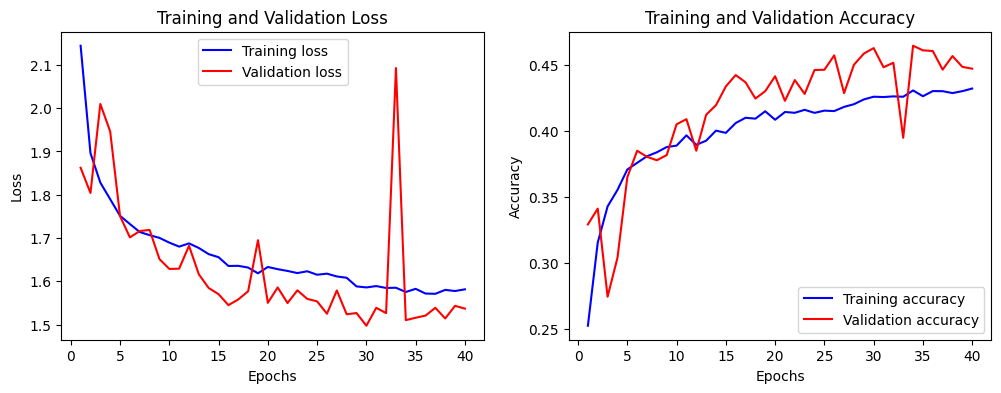

In [139]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 시각화
epochs = range(1, len(train_loss) + 1)

# Loss 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 모델 평가 및 예측
---
* 테스트 데이터셋을 이용하여 모델을 평가하고 분류 결과를 예측한다.

In [140]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 844us/step - loss: 1.4887 - accuracy: 0.4613


[1.4887146949768066, 0.46129998564720154]

#### 모델 최적화
---
* 하이퍼 파라미터 값을 조정하여 최적의 성능을 이루는 조합을 연구한다.